# Principal Component Analysis with Cancer Data

In [0]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

In [0]:
from google.colab import drive
drive.mount('/content/drive')

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [0]:
cancer_df=pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/internal/R5-PCA_ModelTuning/breast-cancer-wisconsin-data.csv')

In [0]:
cancer_df=cancer_df.drop(columns=['ID'])

In [0]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [118]:
cancer_df.shape

(699, 10)

In [0]:
cancer_df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [0]:
cancer_df.head(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [0]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [0]:
cancer_df.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [0]:
cancer_df[cancer_df.isnull()=='TRUE'].count()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [0]:
# no missing value found

In [0]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
#As we can see only one cloumn Bare Nuclei having object datatype meaning having non numeric value
cancer_df[cancer_df['Bare Nuclei']=='?'].count()

ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [0]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
# first I will see mean of my Bare Nuclei 

In [0]:
# impute with mean value
cancer_df = cancer_df.replace('?',np.nan)

In [0]:
cancer_df=cancer_df.astype('float64')

In [0]:
cancer_df=cancer_df.apply(lambda x: x.fillna(x.median()))

In [0]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null float64
Cell Size                      699 non-null float64
Cell Shape                     699 non-null float64
Marginal Adhesion              699 non-null float64
Single Epithelial Cell Size    699 non-null float64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null float64
Bland Chromatin                699 non-null float64
Mitoses                        699 non-null float64
Class                          699 non-null float64
dtypes: float64(10)
memory usage: 54.7 KB


In [0]:
cancer_df[cancer_df.isnull()=='TRUE'].count()

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [0]:
# Check for correlation of variable
cancer_df.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


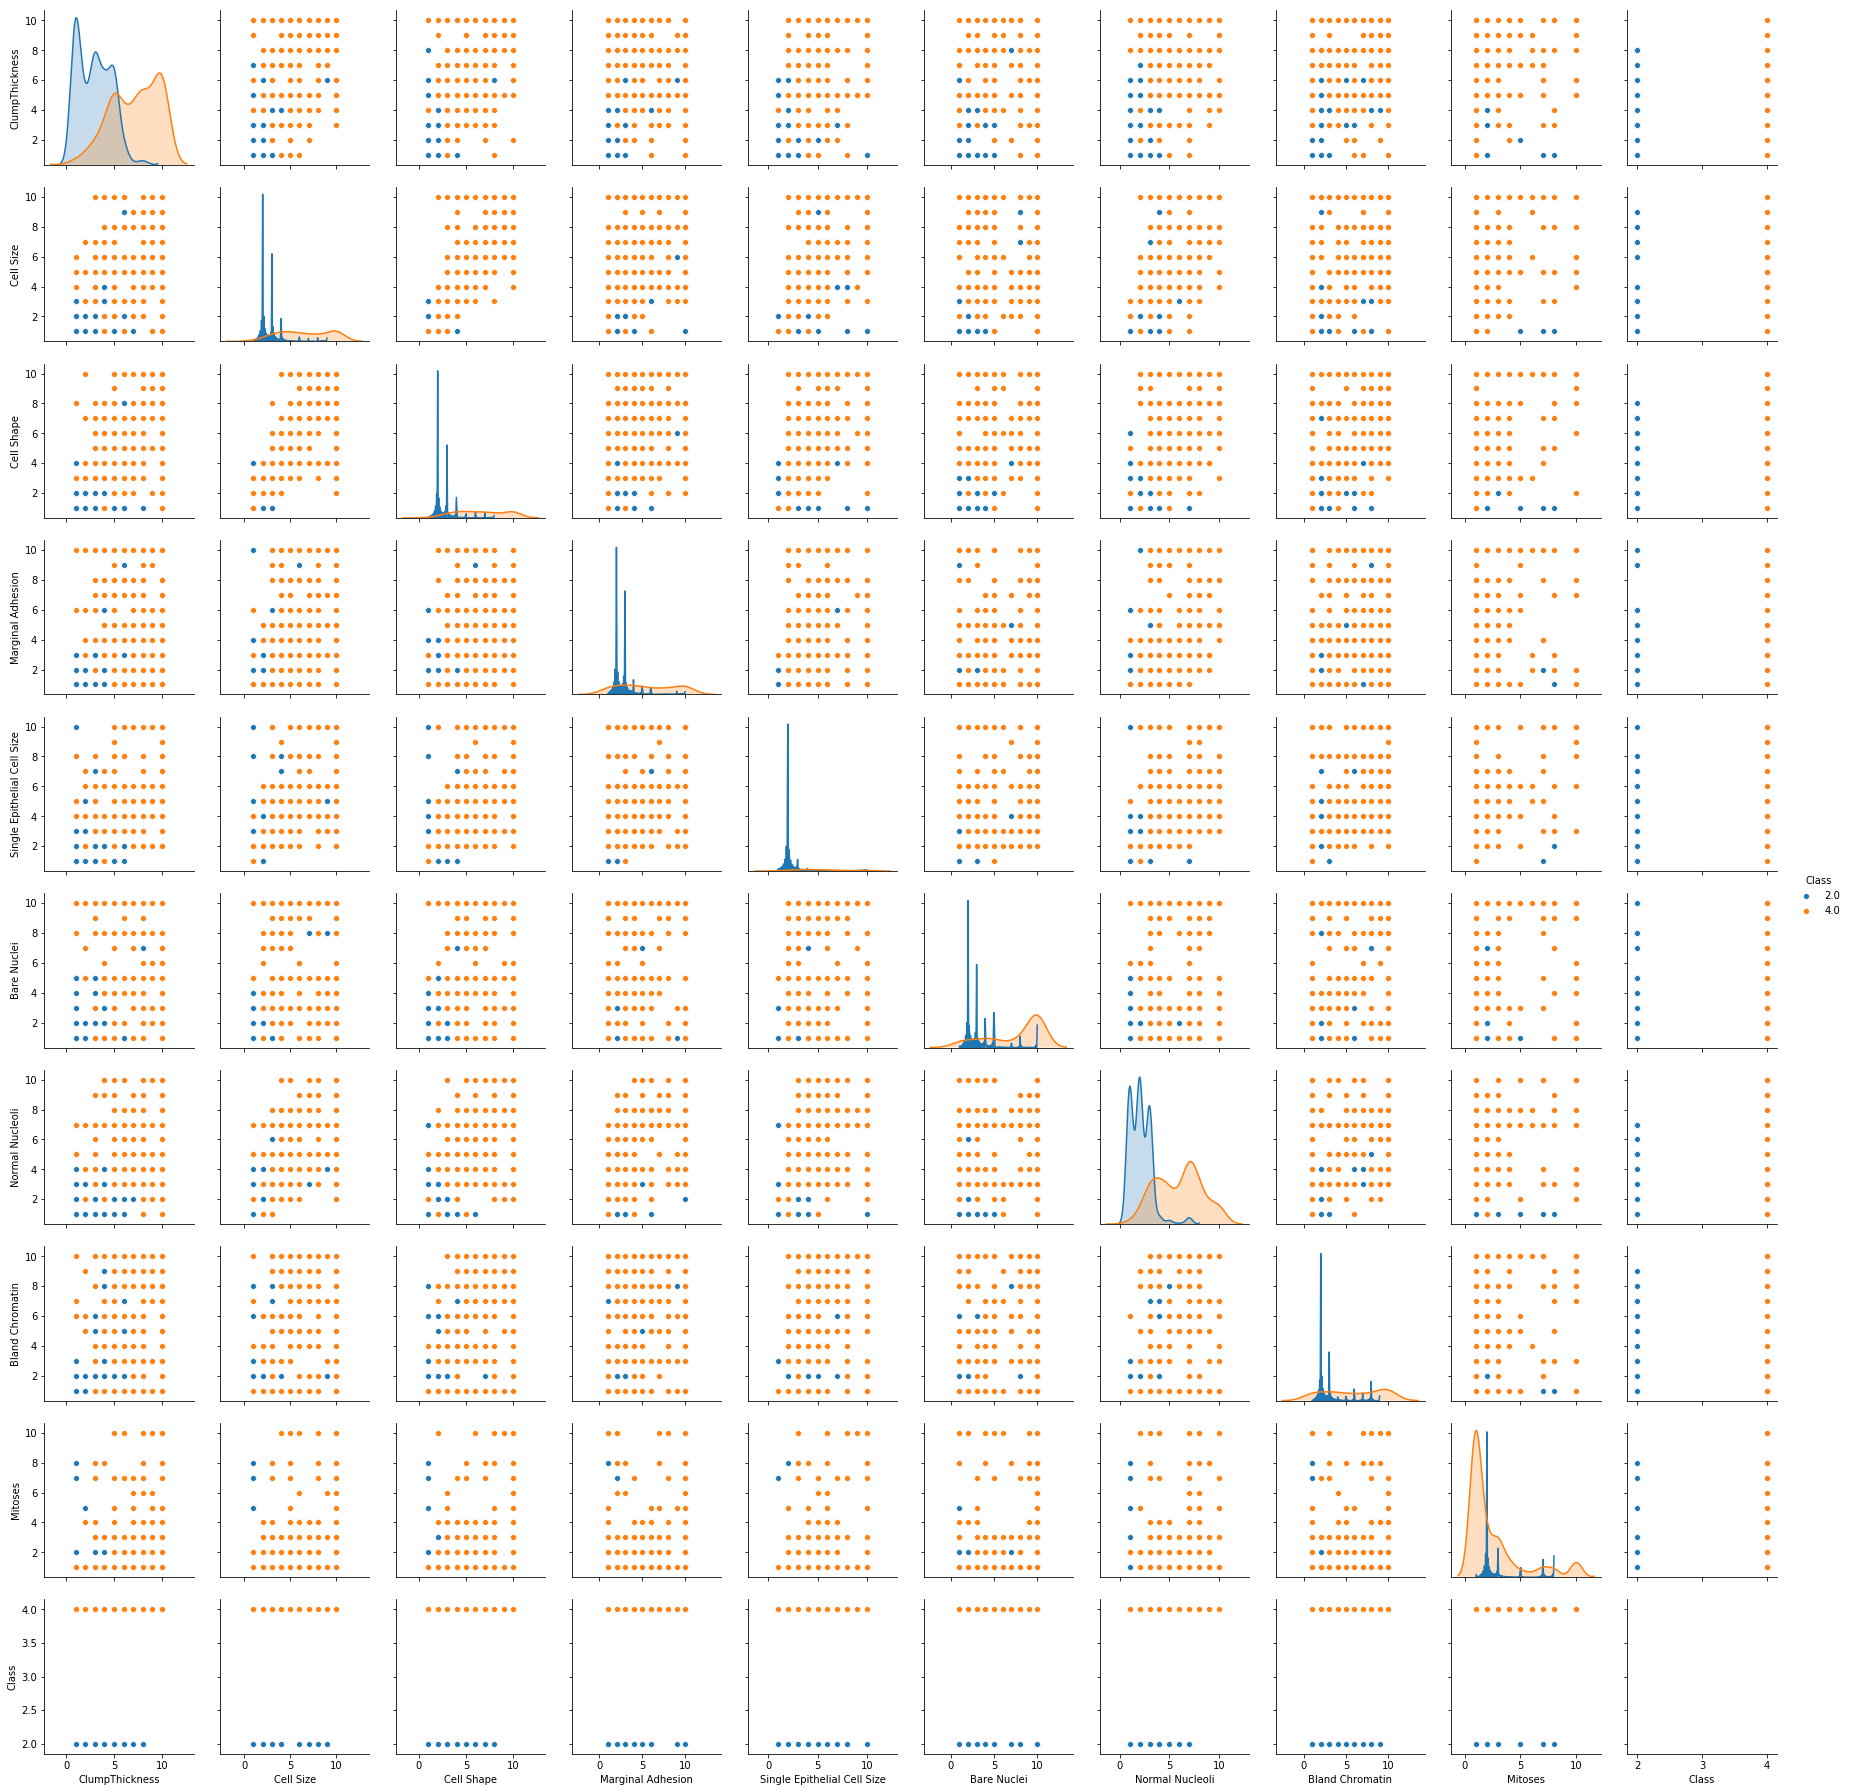

In [0]:
sns.pairplot(cancer_df,diag_kind='kde',hue='Class')

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [0]:
cancer_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

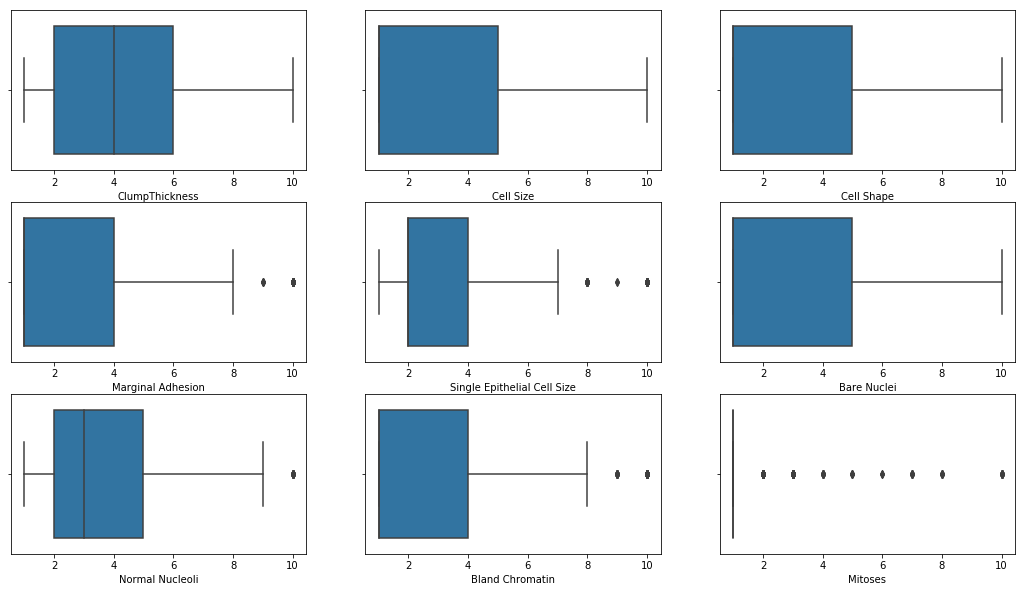

In [0]:
# We could see most of the outliers are now removed.
# box plot see to visualize box plot
plotCofig, axes = plt.subplots(nrows=3,ncols = 3, figsize=(18, 10))

sns.boxplot(cancer_df['ClumpThickness'],ax=axes[0,0])
sns.boxplot(cancer_df['Cell Size'],ax=axes[0,1])
sns.boxplot(cancer_df['Cell Shape'],ax=axes[0,2])
sns.boxplot(cancer_df['Marginal Adhesion'],ax=axes[1,0])
sns.boxplot(cancer_df['Single Epithelial Cell Size'],ax=axes[1,1])
sns.boxplot(cancer_df['Bare Nuclei'],ax=axes[1,2])
#####2nd row
sns.boxplot(cancer_df['Normal Nucleoli'],ax=axes[2,0])
sns.boxplot(cancer_df['Bland Chromatin'],ax=axes[2,1])
sns.boxplot(cancer_df['Mitoses'],ax=axes[2,2])

In [210]:
cancer_df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [241]:
cancer_df['Mitoses'].mean()+2*(cancer_df['Mitoses'].std())

5.019569332796132

In [240]:
cancer_df['Mitoses'].mean()-2*(cancer_df['Mitoses'].std())

-1.8407424372310386

In [0]:
# removing outlier for mitoses beacuse having lots of outliner , so replaceing boundary value with mitonses
# outside boundary

In [0]:
y=cancer_df['Class']
x=cancer_df.drop(columns=['Class'])

In [0]:
# standarize the values using zscore
#cancer_df_z=zscore(cancer_df.iloc[:,0:8])
sc = StandardScaler()
X_train_std =  sc.fit_transform(x)          
#train_cov_matrix = np.cov(X_train_std.T)

# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix
train_cov_matrix = np.cov(X_train_std.T)

In [242]:
train_cov_matrix[0:5]

array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.5908535 , 0.5592282 , 0.53660222, 0.35053534],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68765657, 0.75680368, 0.72390044, 0.4593503 ],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.70848734, 0.73700282, 0.72047704, 0.43953974],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66792658, 0.66767051, 0.60421681, 0.41823111],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.5845377 , 0.61698451, 0.62978166, 0.47978787]])

# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector
eigenvalues, eigenvectors = np.linalg.eig(train_cov_matrix)

In [218]:
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [231]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

train_eig_pairs.sort()

train_eig_pairs.reverse()
print(train_eig_pairs)

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
# Extract the descending ordered eigenvalues and eigenvectors
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]

[(5.8985518995822375, array([-0.30280515, -0.38119012, -0.37757351, -0.33282286, -0.33639134,
       -0.33349748, -0.3459564 , -0.33584019, -0.22981766])), (0.7758830680807649, array([ 0.14602888,  0.04956364,  0.08526953,  0.04471887, -0.16403795,
        0.2477099 ,  0.22994199, -0.02502678, -0.90839421])), (0.539601554819918, array([-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
       -0.00367104,  0.19744944,  0.13164974, -0.09459348])), (0.46640555062123185, array([-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
       -0.5431767 , -0.00698988,  0.45537199, -0.23968608])), (0.38101775525038867, array([ 0.07192848, -0.13735749, -0.10469081,  0.03462797, -0.68258246,
       -0.1275059 ,  0.25519148,  0.63180293,  0.1316273 ])), (0.3040559187392038, array([ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
       -0.57486596, -0.31459721, -0.03841564, -0.14360708])), (0.29609473619399684, array([-0.00131277,  0.21521315,  0.14204379, 

In [0]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(train_eigvalues_sorted, reverse=True)]  
# an array of variance explained by each 
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. 
# cumulative reaching almost 100%

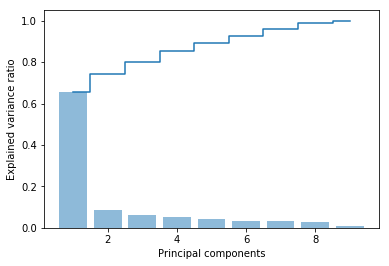

In [234]:
plt.bar(range(1,eigenvalues.size+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,eigenvalues.size+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
#plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [0]:
#findling component of feature using projection or dot product
P_reduce = np.array(train_eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_train_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)

In [236]:
Proj_data_df.head()

,0,1,2,3
0,1.456220,0.110210,-0.574438,-0.019405
1,-1.466279,0.544894,0.283038,-0.660281
2,1.579311,0.074854,0.037413,-0.106777
3,-1.505247,0.558853,-0.612984,1.441160
4,1.330551,0.089657,0.027402,-0.317714


In [0]:
pca=PCA(n_components=9)
pca.fit_transform(X_train_std)

In [246]:
pca.components_

array([[ 0.30280515,  0.38119012,  0.37757351,  0.33282286,  0.33639134,
         0.33349748,  0.3459564 ,  0.33584019,  0.22981766],
       [-0.14602888, -0.04956364, -0.08526953, -0.04471887,  0.16403795,
        -0.2477099 , -0.22994199,  0.02502678,  0.90839421],
       [-0.86221719,  0.01909154, -0.0345843 ,  0.42144828,  0.11010437,
        -0.00367104,  0.19744944,  0.13164974, -0.09459348],
       [-0.08821658,  0.2026394 ,  0.17515522, -0.4703171 ,  0.37332927,
        -0.5431767 , -0.00698988,  0.45537199, -0.23968608],
       [-0.07192848,  0.13735749,  0.10469081, -0.03462797,  0.68258246,
         0.1275059 , -0.25519148, -0.63180293, -0.1316273 ],
       [ 0.26946934,  0.1000979 ,  0.03200191,  0.68083355, -0.03559797,
        -0.57486596, -0.31459721, -0.03841564, -0.14360708],
       [-0.00131277,  0.21521315,  0.14204379, -0.0861038 , -0.18337725,
        -0.41187463,  0.67301535, -0.50406321,  0.12567403],
       [ 0.24081701, -0.44088652, -0.58600968,  0.11866965,  0

# Q10 Find correlation between components and features

In [0]:
# find correlation b/w 
com_df=pd.DataFrame(pca.components_,columns=x.columns)

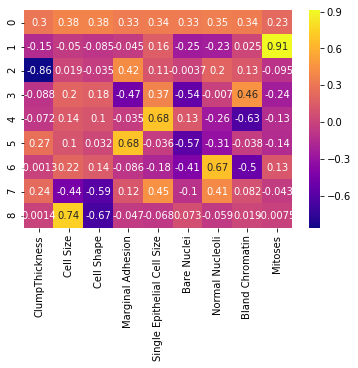

In [252]:
sns.heatmap(com_df,cmap='plasma',annot=True)

In [0]:
Proj_data_dfwithy=Proj_data_df.join(y)

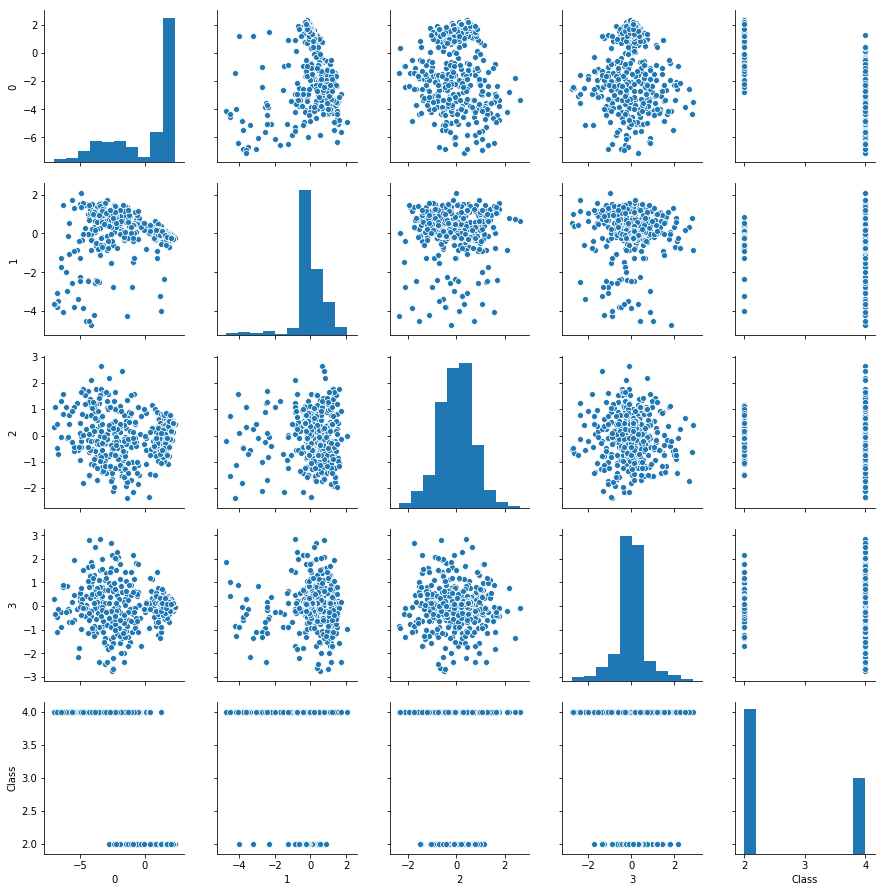

In [238]:
sns.pairplot(Proj_data_dfwithy)

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [148]:
jokes_df=pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/internal/R5-PCA_ModelTuning/jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,Joke11,Joke12,Joke13,Joke14,Joke15,Joke16,Joke17,Joke18,Joke19,Joke20,Joke21,Joke22,Joke23,Joke24,Joke25,Joke26,Joke27,Joke28,Joke29,Joke30,Joke31,Joke32,Joke33,Joke34,Joke35,Joke36,Joke37,Joke38,Joke39,...,Joke61,Joke62,Joke63,Joke64,Joke65,Joke66,Joke67,Joke68,Joke69,Joke70,Joke71,Joke72,Joke73,Joke74,Joke75,Joke76,Joke77,Joke78,Joke79,Joke80,Joke81,Joke82,Joke83,Joke84,Joke85,Joke86,Joke87,Joke88,Joke89,Joke90,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.0,99.00,99.0,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.0,99.00,99.0,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.0,99.00,99.0,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.0,99.00,99.0,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [149]:
jokes_df.shape

(24983, 101)

# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [0]:
ratings=jokes_df.iloc[0:200,1:]

In [154]:
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [0]:
ratings.columns = np.arange(0,100,1)

In [162]:
ratings.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 99, dtype: float64

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [0]:
ratings=ratings.replace(99,0)

In [205]:
ratings.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,0.0,0.00,0.0,0.00,0.00,0.00,0.00,-9.42,0.00,0.00,0.00,-7.72,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.0
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,0.0
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,0.00,8.25,0.00,0.00,7.48,7.28,7.28,8.93,0.00,6.17,7.28,0.00,0.00,8.98,7.33,0.00,6.17,9.08,7.33,...,6.46,7.28,0.00,0.00,7.04,7.28,0.00,7.28,8.25,0.00,0.0,0.00,0.0,0.00,0.00,8.93,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.03,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.0
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,0.00,0.00,0.00,0.00,2.91,3.93,6.75,6.60,0.00,6.65,-6.12,0.00,7.57,6.21,6.65,0.00,-8.30,7.18,2.82,...,0.00,-3.69,0.00,0.00,7.82,0.24,0.00,7.28,-2.33,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.00,0.00,-2.33,0.00,0.00,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.0
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,0.0,0.00,0.0,0.00,0.00,0.00,4.13,0.00,0.00,0.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,0.0


# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [0]:
sc1=StandardScaler()
ratings_sc=sc1.fit_transform(ratings)
ratings_diff=pd.DataFrame(ratings_sc)

In [207]:
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,-2.070680,-1.816124,-1.100839,1.446713,-1.083372,-0.924987,-1.485689,-1.845722,-2.122490,-1.783991,-2.453942,0.118382,-1.001283,-2.056184,-1.998067,-0.007503,1.066496,0.348160,1.210200,-1.558247,-0.106543,-1.445456,-1.979706,1.434165,0.400517,0.327022,-1.913859,-1.859857,-2.045886,-2.017453,...,1.360764,0.153729,-1.625066,-1.962794,0.057344,-0.790932,-2.075054,1.274203,0.641743,-1.337306,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,-0.074512,-3.490156,-0.084501,-0.171033,-0.138830,-2.441033,-0.272871,-0.135909,-0.134282,-0.077980,-0.205878,-0.285698,-0.433334,0.100419,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,0.0
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,1.195968,1.637944,1.088796,1.219007,1.186340,0.372816,1.234175,0.012507,0.626254,-0.075678,-0.347704,1.610825,1.700324,2.423967,-0.113462,1.307536,0.370800,-0.058399,-0.729363,1.781590,0.791787,-0.779575,1.570433,1.694826,-1.101271,-0.704008,1.726491,0.520218,-0.405517,1.624417,...,-1.929073,-1.311459,-2.117020,1.320223,0.313423,-1.325031,2.041420,-0.249882,-0.392271,1.732496,-1.313735,0.534747,2.735533,2.679258,2.418432,1.754720,2.563571,2.840787,2.575680,2.258121,0.967082,1.384279,1.227016,1.899786,2.707365,1.353693,-0.222895,0.974583,0.936180,0.269755,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.0
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,1.320208,1.397798,2.023167,0.937724,-0.924840,-0.800160,-1.582425,1.988783,1.823995,1.948990,0.970752,-0.195157,1.679084,0.259426,-0.124483,1.289186,0.945700,1.251171,1.169453,0.162626,0.723794,0.948342,0.007672,-0.250439,1.262127,0.908504,0.139155,1.078930,1.762035,1.494908,...,0.902468,0.932769,-0.088552,0.233179,0.915007,1.077335,0.022453,1.057690,1.184072,-0.139759,0.041833,-0.363524,-0.124389,0.133933,0.046960,2.616313,-0.074512,-0.248988,-0.084501,2.518811,-0.138830,-0.091677,-0.272871,-0.135909,-0.134282,-0.077980,-0.205878,-0.285698,-0.433334,2.736800,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,0.0
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,1.320208,1.180095,1.445556,1.370811,-1.093038,-0.752607,0.449036,-1.192391,-0.824414,-0.249673,0.571718,-0.195157,-0.073137,0.259426,-0.124483,0.357446,0.196316,1.142891,0.694749,0.162626,0.822693,-1.875328,0.007672,1.380309,0.654835,0.742366,0.139155,-1.839687,1.348130,0.487868,...,-0.487483,-1.383240,-0.088552,0.233179,1.073532,-0.444957,0.022453,1.057690,-1.048553,-0.139759,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,-0.074512,-0.248988,-0.084501,-0.171033,-0.138830,-0.091677,-0.272871,-0.135909,0.065076,-0.077980,-0.205878,-1.081485,-0.433334,0.100419,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,0.0
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,1.517277,1.233960,-0.487364,1.174359,-0.145714,-1.349003,0.797737,-0.125893,0.473662,1.055289,1.159984,1.084081,1.689704,-0.037992,1.588193,0.149486,-0.944537,0.924289,1.071659,1.230355,1.113207,-2.581246,1.601076,0.973161,-0.162928,-0.100538,-0.142939,1.206002,0.766486,0.411949,...,1.100417,0.698424,0.969487,-0.321286,0.984107,0.489177,1.671815,0.408149,0.078311,0.813796,0.041833,-0.363524,-0.124389,0.133933,0.046960,-0.212373,1.336794,-0.248988,-0.084501,-0.171033,1.335719,1.709902,-0.003819,2.305584,1.109334,-0.277970,1.941730,1.322953,0.413602,0.964615,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.72

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [209]:
ratings_diff.mean().sort_values(ascending=False).head(10).index

Int64Index([98, 81, 97, 20, 94, 92, 47, 73, 49, 53], dtype='int64')